In [8]:
import scanpy as sc
import anndata
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def plot_qc_metrics(adata):

    fig, axs = plt.subplots(1, 3, figsize=(20, 4))

    axs[0].set_title("Total transcripts per cell")
    sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    
    axs[1].set_title("Unique transcripts per cell")
    sns.histplot(adata.obs["n_genes_by_counts"].unique(), kde=False, ax=axs[1])

    
    axs[2].set_title("Number of genes per cell")
    sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[2])

    plt.tight_layout()
    plt.show()

In [10]:
output_dir = "./Output"
file_path = "./data/malpighian_tubule.tsv"
os.makedirs(output_dir, exist_ok=True)

Number of cells: 12418
Number of genes: 7015
<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 12418 × 7015
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'>


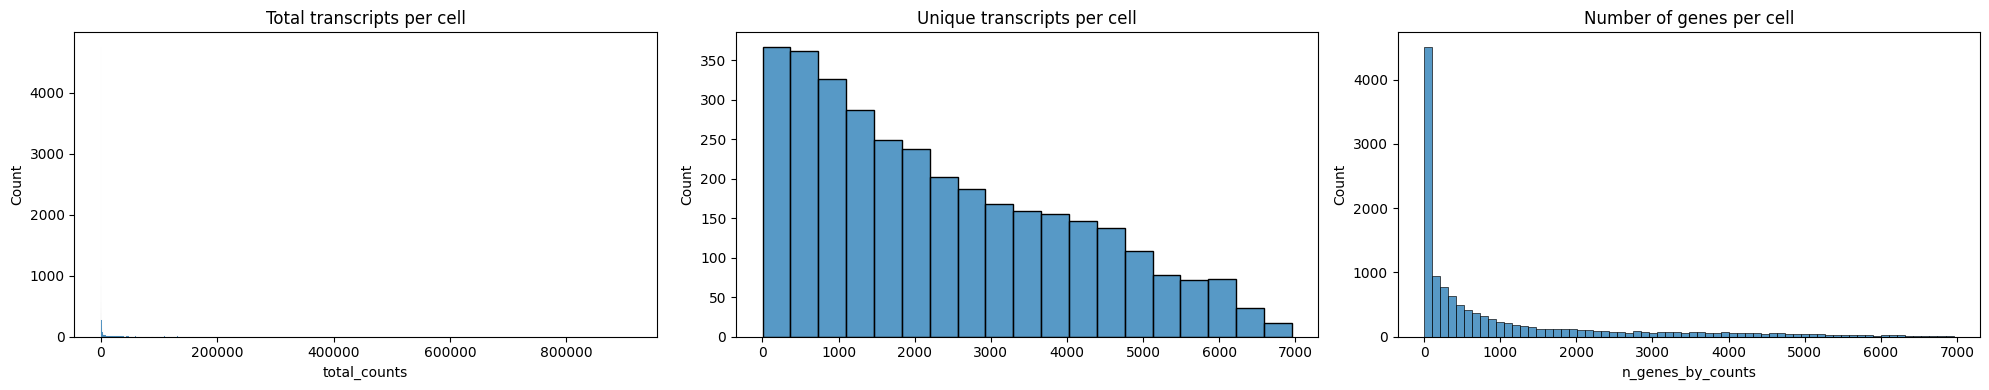

Number of cells after filtering: 12418
Number of genes after filtering: 7015


"\nsc.pp.normalize_total(data,target_sum=1e6)\nsc.pp.log1p(data)\n\nn_comps = min(50,data.shape[1]) #n_comp\nsc.pp.pca(data, n_comps=n_comps)\n\n\nsc.pp.neighbors(data)\nsc.tl.umap(data,min_dist=0.1)\n\nsc.tl.leiden(data, flavor='igraph', n_iterations=2, directed=False)\n        \nsc.pl.umap(data, color='leiden', title='Leiden Clustering Results')\n"

In [11]:
data=sc.read(file_path)

print(f"Number of cells: {data.n_obs}")
print(f"Number of genes: {data.n_vars}")

sc.pp.calculate_qc_metrics(data, inplace=True)
print(data.obs_names_make_unique)
plot_qc_metrics(data)

#sc.pp.filter_cells(data, min_genes=10)  # Filter out cells with fewer than 10 genes
#sc.pp.filter_genes(data, min_cells=10)  # Filter out genes expressed in fewer than 10 cells
 
# Print the number of cells and genes after filtering
print(f"Number of cells after filtering: {data.n_obs}")
print(f"Number of genes after filtering: {data.n_vars}")

'''
sc.pp.normalize_total(data,target_sum=1e6)
sc.pp.log1p(data)

n_comps = min(50,data.shape[1]) #n_comp
sc.pp.pca(data, n_comps=n_comps)


sc.pp.neighbors(data)
sc.tl.umap(data,min_dist=0.1)

sc.tl.leiden(data, flavor='igraph', n_iterations=2, directed=False)
        
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')
'''  
